In [1]:
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_opensmile = pd.read_csv("/content/audio_features_version_opensmile.csv")
df_opensmile.drop(columns=['audio_file'], inplace=True)

In [3]:
df_opensmile

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,audio_label
0,15.399089,0.173203,13.353405,14.417707,17.361105,4.007700,106.564842,62.421993,78.279076,44.601460,...,-0.028582,6.187143,0.456621,4.205608,0.190000,0.209231,0.035000,0.021409,-10.673471,On_State
1,14.981872,0.130598,13.421833,14.633707,16.169710,2.747877,108.869804,102.208641,108.804977,150.421036,...,-0.021069,1.033430,0.033422,5.925678,0.081017,0.088414,0.085704,0.067643,-18.810062,Off_State
2,15.303030,0.169017,12.768573,14.887411,17.265654,4.497081,136.621735,165.584167,142.921143,145.303482,...,-0.029695,14.152112,11.860638,3.129657,0.274048,0.246577,0.033929,0.015199,-4.977754,Normal_State
3,15.348002,0.147474,13.440224,14.940626,16.790613,3.350389,120.404892,94.588539,116.774590,86.601913,...,-0.024594,4.775468,1.463415,4.738155,0.152632,0.191609,0.048571,0.036422,-8.184216,On_State
4,15.352334,0.139169,13.640087,14.986534,16.687069,3.046982,141.487289,129.437393,114.644188,138.916336,...,-0.020508,2.292343,0.177778,5.625000,0.075714,0.084791,0.095849,0.063169,-14.579620,Off_State
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,17.205296,0.173706,15.003145,16.914299,19.109932,4.106787,142.458755,110.103249,194.316833,181.541183,...,-0.020120,7.978610,3.850268,6.350915,0.090169,0.087188,0.057826,0.046387,-10.086802,Bolt_Case
61,17.820509,0.170492,15.074764,17.702007,20.575474,5.500710,204.832962,203.418472,126.628220,78.352989,...,-0.019487,8.169230,4.719501,5.282005,0.114746,0.102136,0.067174,0.065131,-10.459385,Bolt_Case
62,17.559616,0.172573,14.991419,16.934710,19.089832,4.098413,168.610184,164.181473,158.846313,162.376373,...,-0.020971,7.974329,4.649123,5.550661,0.118571,0.099057,0.054000,0.039519,-10.610080,Bolt_Case
63,17.351109,0.182056,15.005396,16.727970,19.187778,4.182383,202.769470,175.782501,153.958206,146.849167,...,-0.011227,8.737162,3.192338,5.212510,0.082615,0.055782,0.107170,0.069564,-9.125429,Solid_Case


In [4]:
df_opensmile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 89 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   F0semitoneFrom27.5Hz_sma3nz_amean               65 non-null     float64
 1   F0semitoneFrom27.5Hz_sma3nz_stddevNorm          65 non-null     float64
 2   F0semitoneFrom27.5Hz_sma3nz_percentile20.0      65 non-null     float64
 3   F0semitoneFrom27.5Hz_sma3nz_percentile50.0      65 non-null     float64
 4   F0semitoneFrom27.5Hz_sma3nz_percentile80.0      65 non-null     float64
 5   F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2        65 non-null     float64
 6   F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope     65 non-null     float64
 7   F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope   65 non-null     float64
 8   F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope    65 non-null     float64
 9   F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlop

In [5]:
df_opensmile.isnull().sum()


,0
F0semitoneFrom27.5Hz_sma3nz_amean,0
F0semitoneFrom27.5Hz_sma3nz_stddevNorm,0
F0semitoneFrom27.5Hz_sma3nz_percentile20.0,0
F0semitoneFrom27.5Hz_sma3nz_percentile50.0,0
F0semitoneFrom27.5Hz_sma3nz_percentile80.0,0
...,...
StddevVoicedSegmentLengthSec,0
MeanUnvoicedSegmentLength,0
StddevUnvoicedSegmentLength,0
equivalentSoundLevel_dBp,0


In [6]:
df_opensmile.shape


(65, 89)

In [7]:
feature_columns = df_opensmile.columns[0:88].tolist()
labels = df_opensmile['audio_label'].to_list()

In [8]:
from sklearn.model_selection import train_test_split

# Feature columns (all except the target column 'audio_label')
X = df_opensmile.drop(columns=['audio_label'])
y = df_opensmile['audio_label']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

print(f"Model accuracy: {rf.score(X_test, y_test)}")


Model accuracy: 1.0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(importance_df.head(10))


                            Feature  Importance
64      slopeV500-1500_sma3nz_amean    0.041284
14     loudness_sma3_percentile80.0    0.040776
23            mfcc1_sma3_stddevNorm    0.038234
13     loudness_sma3_percentile50.0    0.033792
67  spectralFluxV_sma3nz_stddevNorm    0.030669
10              loudness_sma3_amean    0.029824
81              loudnessPeaksPerSec    0.029254
76        alphaRatioUV_sma3nz_amean    0.028174
11         loudness_sma3_stddevNorm    0.027491
66       spectralFluxV_sma3nz_amean    0.024715


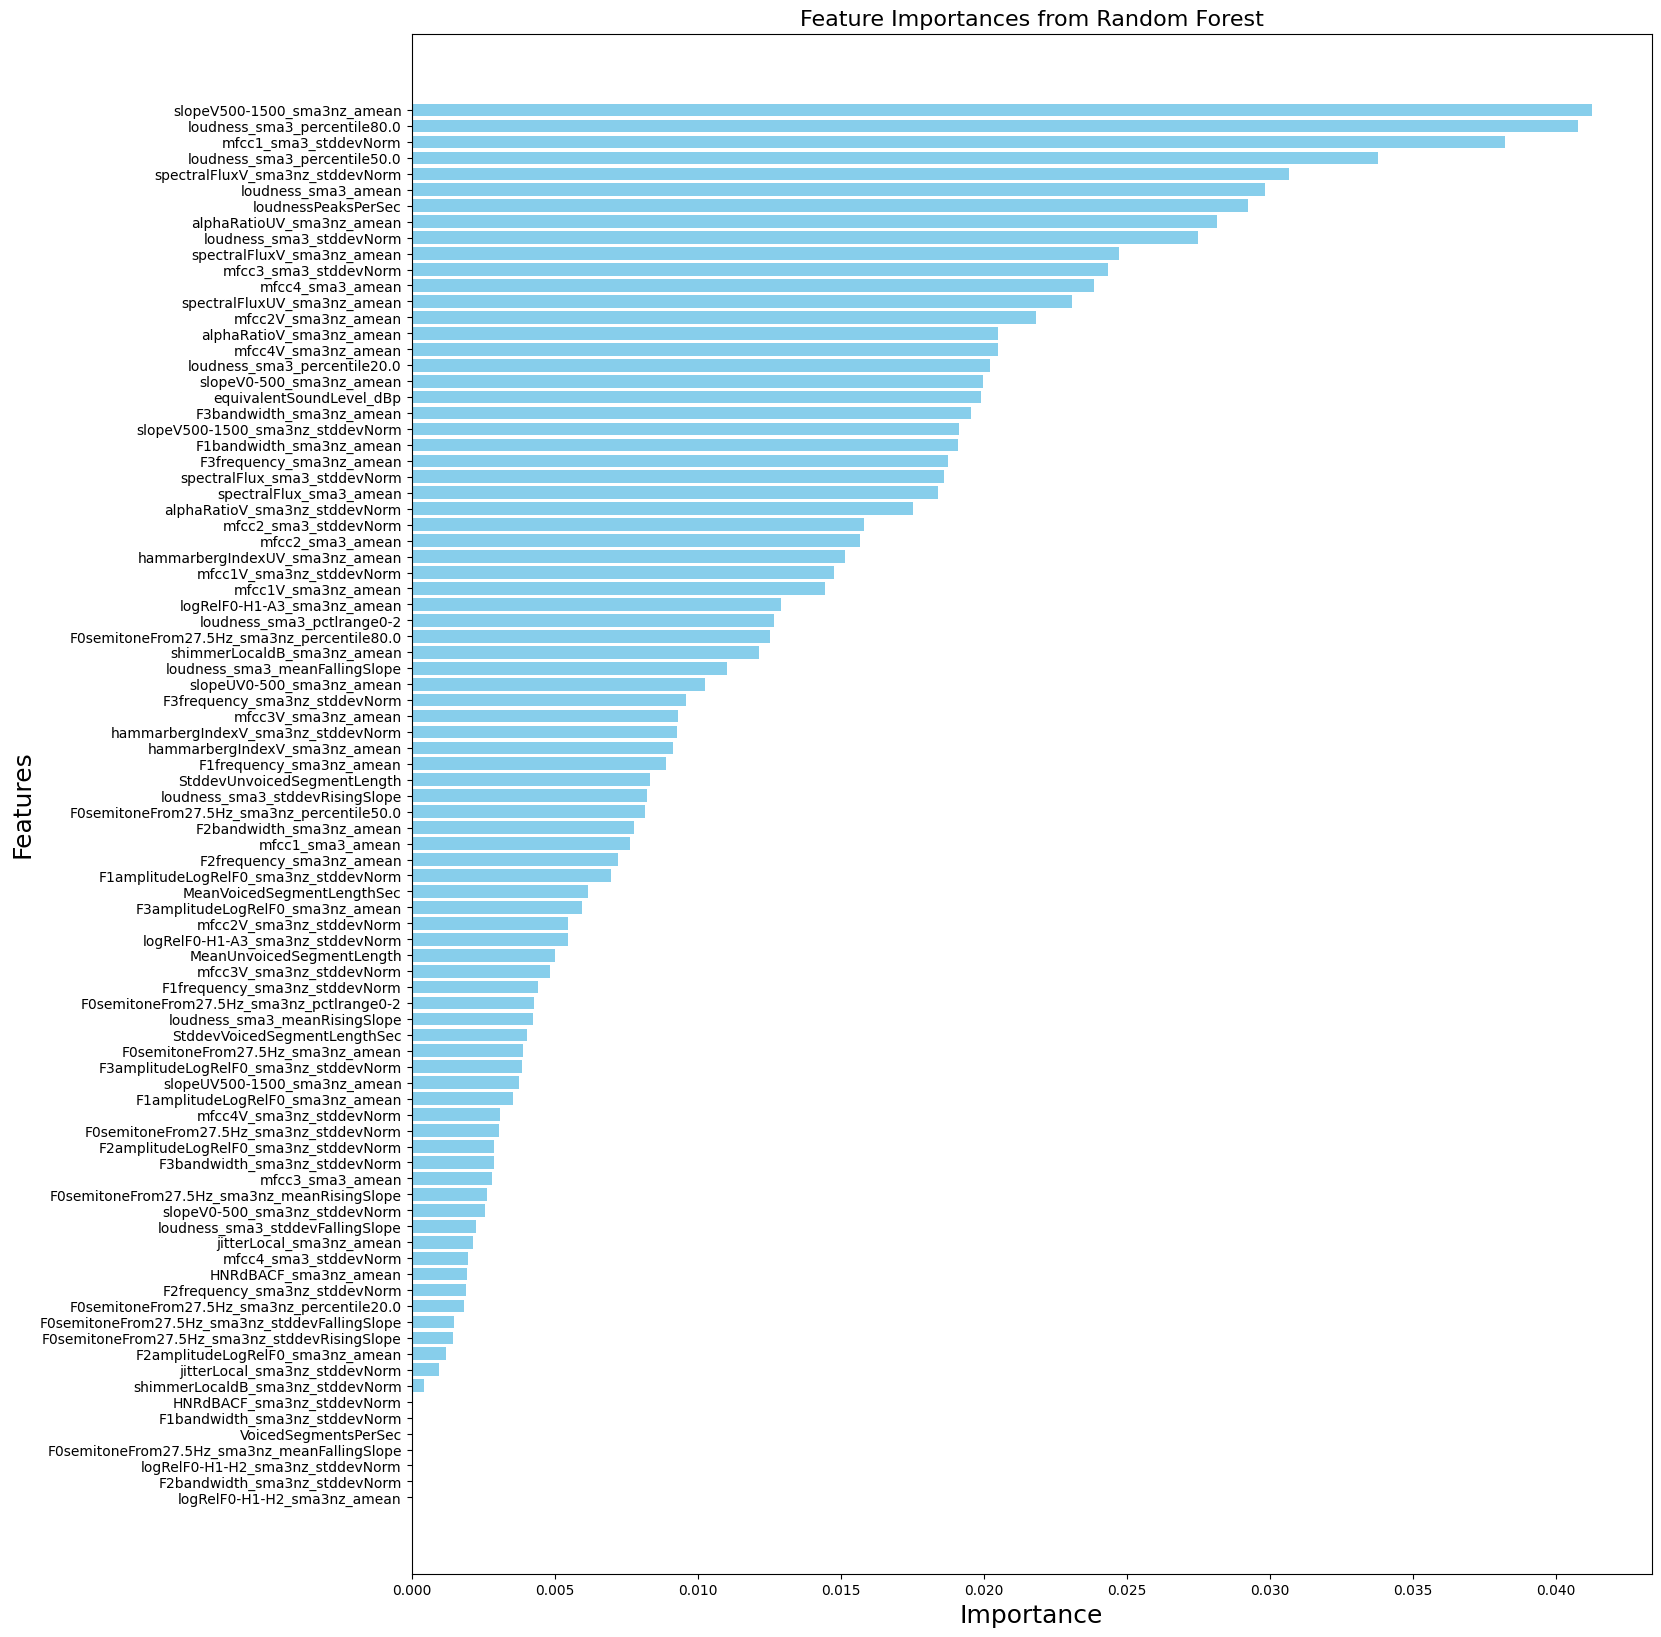

In [11]:
# Plot the feature importances
plt.figure(figsize=(16, 20))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.title('Feature Importances from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=18)
plt.ylabel('Features', fontsize=18)
plt.show()


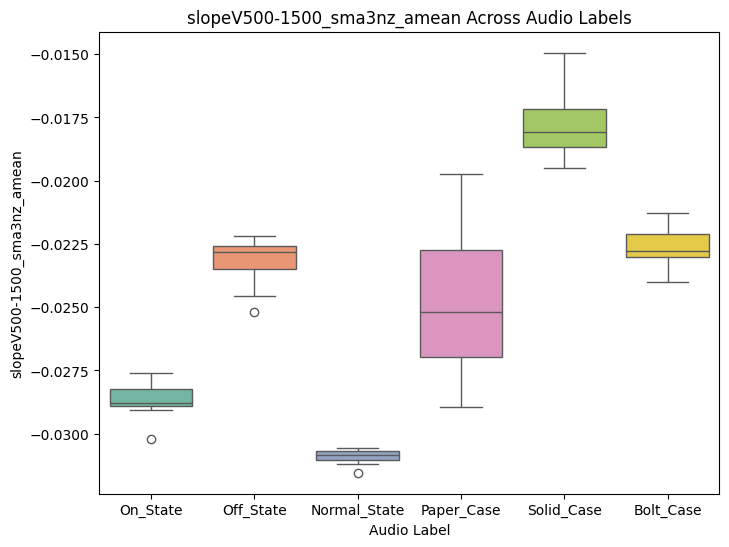

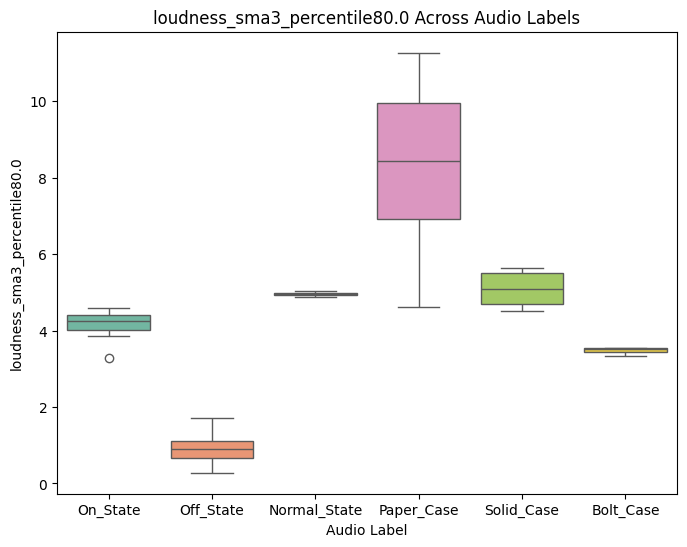

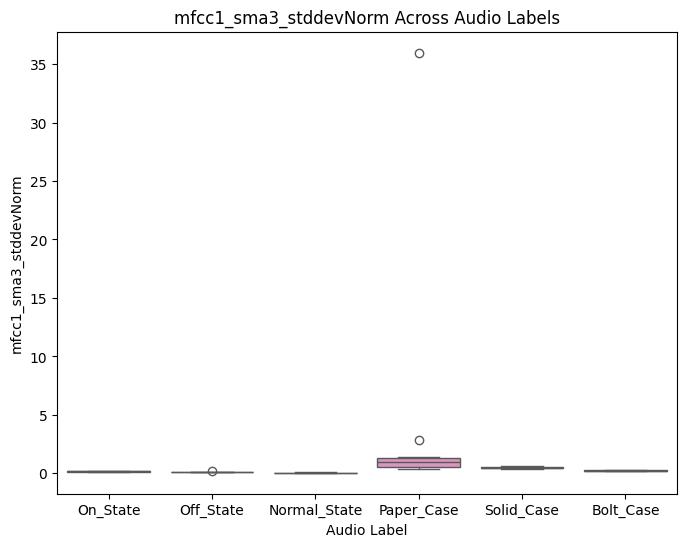

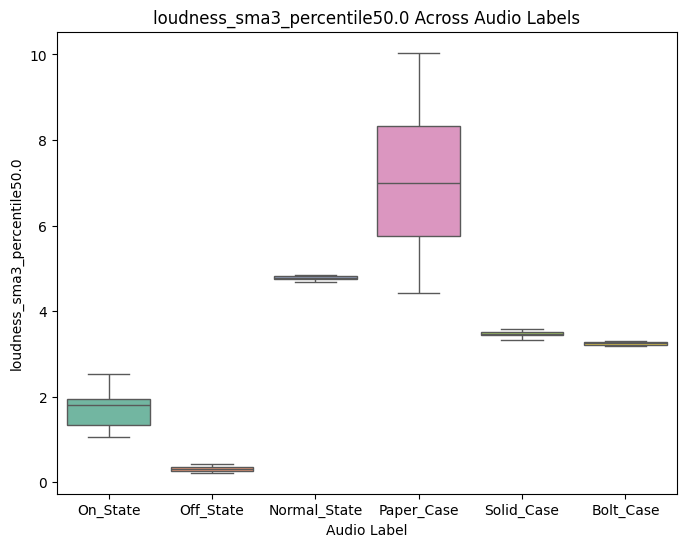

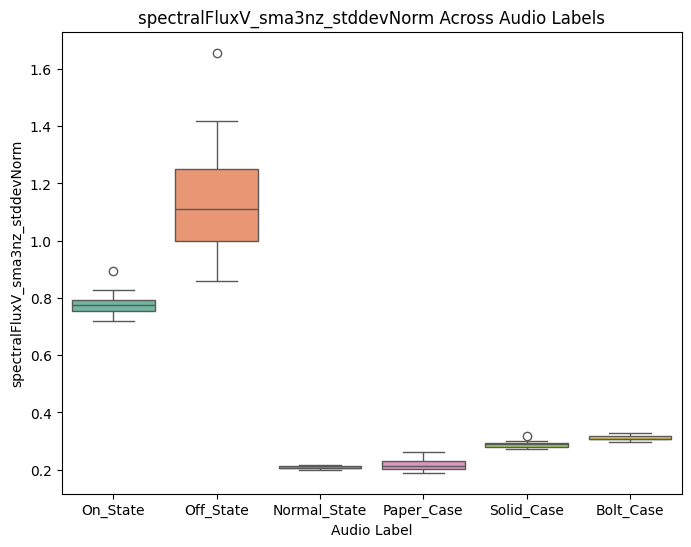

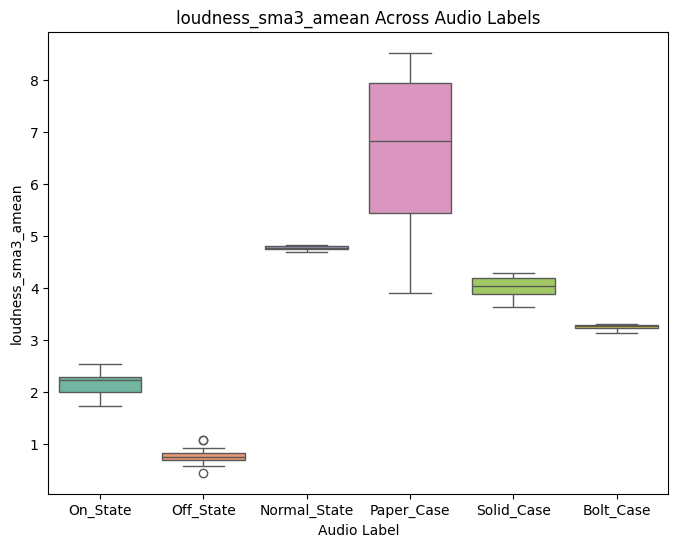

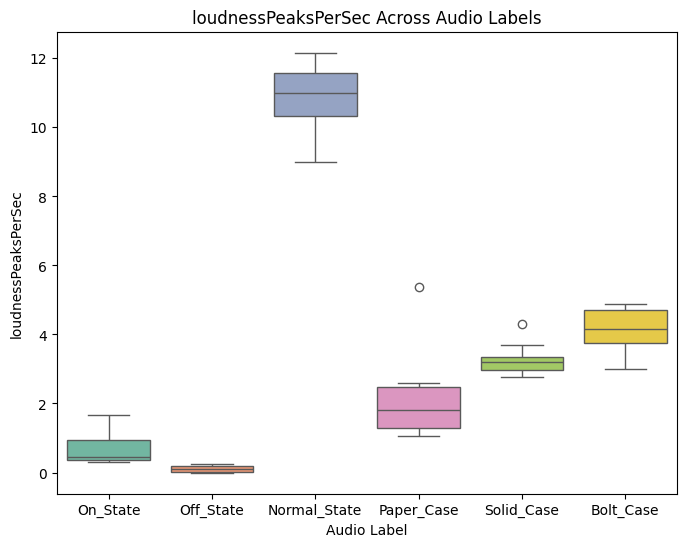

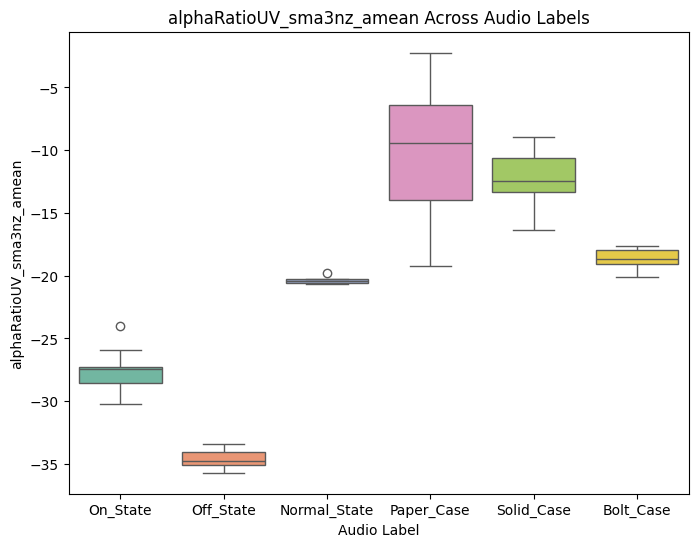

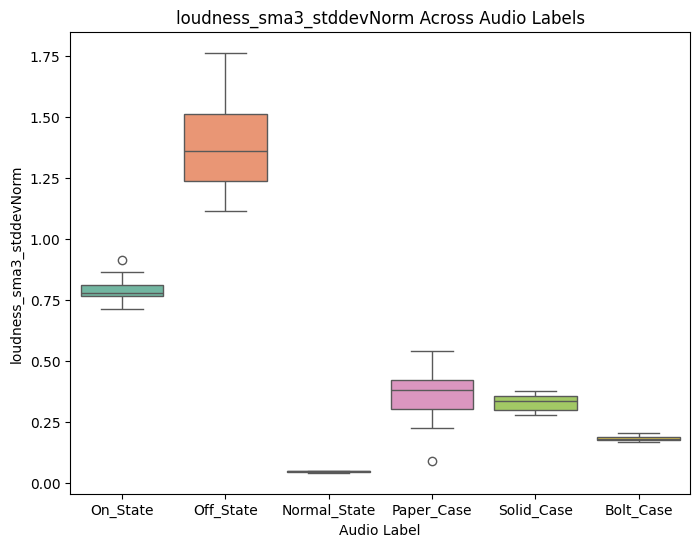

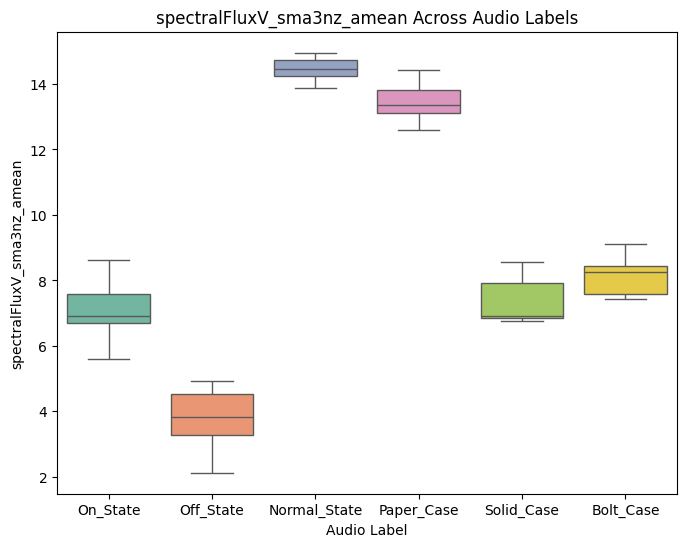

In [12]:
def plot_feature_by_label(df, feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='audio_label', y=feature, palette='Set2')
    plt.title(f'{feature} Across Audio Labels')
    plt.xlabel('Audio Label')
    plt.ylabel(feature)
    plt.show()

# Plot boxplots for selected features across different audio labels
features_to_plot_by_label = importance_df.head(10)['Feature']
for feature in features_to_plot_by_label:
    plot_feature_by_label(df_opensmile, feature)


In [13]:
# Keep features with importance > 0.01
selected_features = importance_df[importance_df['Importance'] > 0.01]['Feature'].tolist()

# Filter dataset
X_selected = X[selected_features]


In [14]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=rf, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_rfe = X.columns[rfe.support_]
print("Top features from RFE:", selected_features_rfe)


Top features from RFE: Index(['loudness_sma3_amean', 'loudness_sma3_stddevNorm',
       'loudness_sma3_percentile20.0', 'loudness_sma3_percentile50.0',
       'spectralFlux_sma3_amean', 'mfcc1_sma3_stddevNorm',
       'slopeV500-1500_sma3nz_amean', 'mfcc2V_sma3nz_amean',
       'alphaRatioUV_sma3nz_amean', 'hammarbergIndexUV_sma3nz_amean'],
      dtype='object')


In [15]:
! pip install mlflow

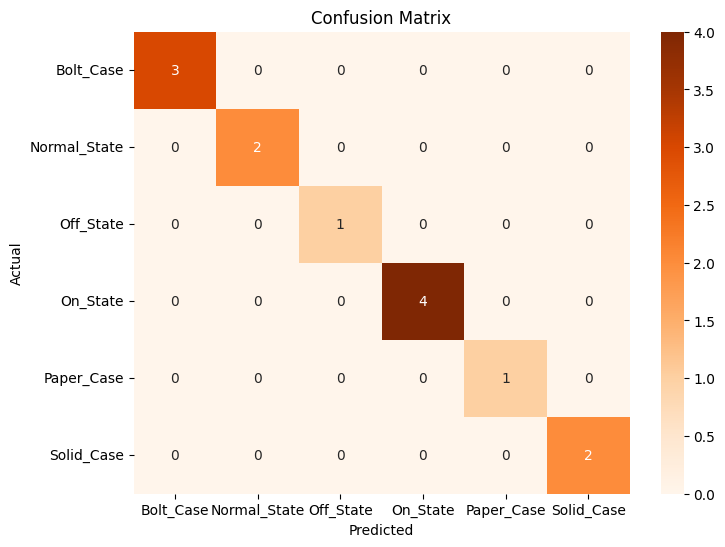

Classification Report:
               precision    recall  f1-score   support

   Bolt_Case       1.00      1.00      1.00         3
Normal_State       1.00      1.00      1.00         2
   Off_State       1.00      1.00      1.00         1
    On_State       1.00      1.00      1.00         4
  Paper_Case       1.00      1.00      1.00         1
  Solid_Case       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
import seaborn as sns

# Predict on the test set
y_pred = rf.predict(X_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multi-class classification
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print individual metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


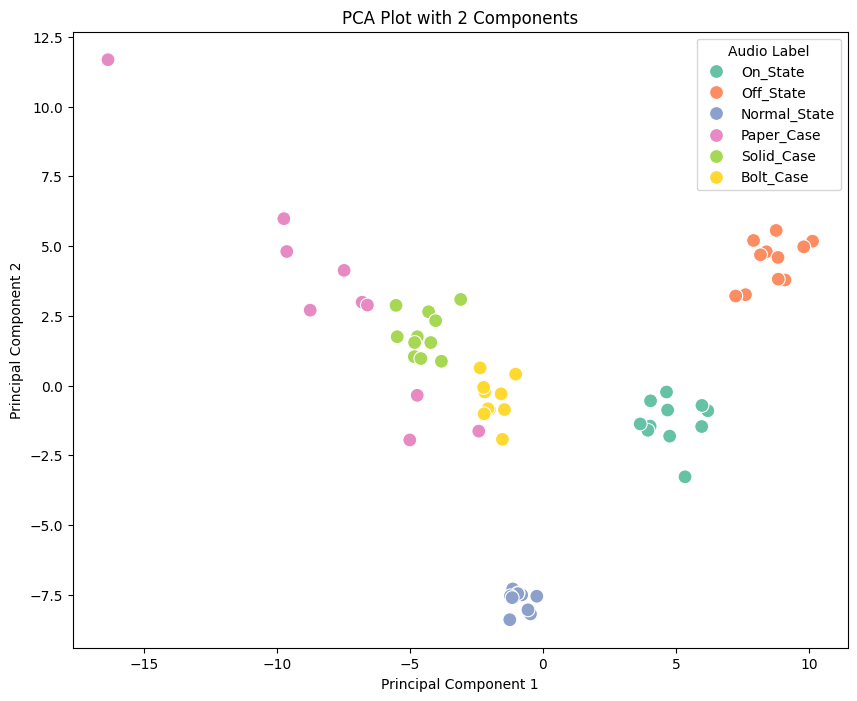

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Function to fill missing values, perform PCA, and plot
def fill_missing_and_plot_pca(df, feature='loudness_sma3_percentile80.0', n_components=2):

    # Fill missing values with the mean of the 'audio_label' group
    df[feature] = df.groupby('audio_label')[feature].transform(lambda x: x.fillna(x.mean()))

    # Drop non-numeric columns for PCA
    df_pca = df.drop(columns=['audio_file'], errors='ignore')

    # Normalize the features (excluding audio_label)
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_pca.drop(columns=['audio_label'], errors='ignore'))

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)

    # Add PCA components to DataFrame
    df['pca_1'] = pca_features[:, 0]
    df['pca_2'] = pca_features[:, 1]

    # Plot the PCA components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='pca_1', y='pca_2',
        hue='audio_label',
        data=df, palette='Set2', s=100
    )
    plt.title(f'PCA Plot with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Audio Label', loc='upper right')
    plt.show()

# Perform PCA and plot
fill_missing_and_plot_pca(df_opensmile, feature='loudness_sma3_percentile80.0', n_components=2)


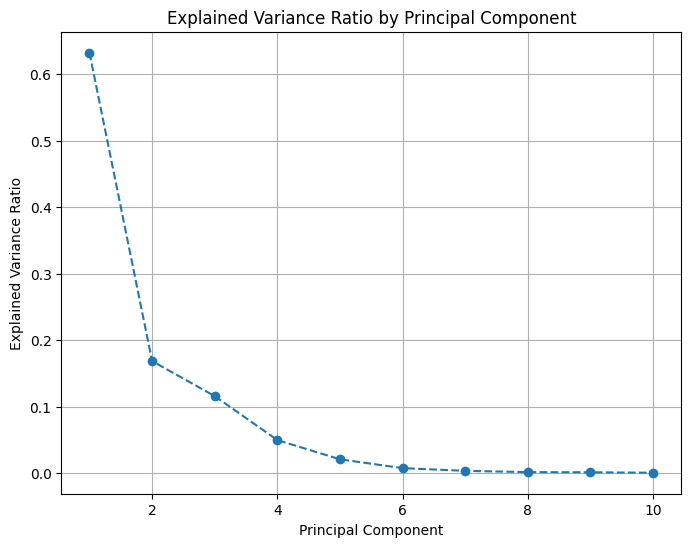

Cumulative variance explained by principal components:
[0.63210011 0.80044978 0.91615567 0.96573045 0.98637302 0.99372036
 0.99703921 0.99841128 0.99952991 1.        ]
Number of components to retain 95% variance: 4


In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Extract the top 10 important features
top_features = importance_df['Feature'].head(10).tolist()
X_top = X[top_features]

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_top)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Optionally: Get cumulative variance explained
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative variance explained by principal components:")
print(cumulative_variance)

# Keep only the number of components that explain a desired variance threshold, e.g., 95%
threshold = 0.95
num_components = next(i for i, total in enumerate(cumulative_variance) if total >= threshold) + 1
print(f"Number of components to retain 95% variance: {num_components}")


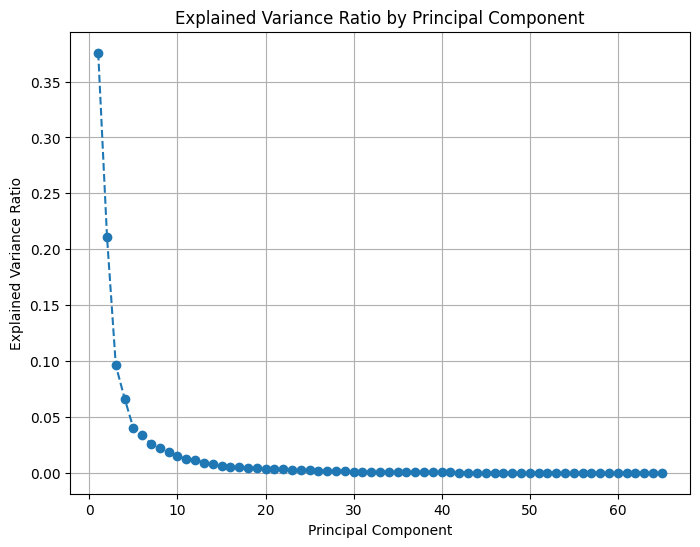

Cumulative variance explained by principal components:
[0.37582603 0.58681667 0.68281818 0.74922484 0.78889902 0.82254696
 0.84827323 0.87049929 0.88863997 0.90350806 0.91593823 0.92766911
 0.93677429 0.94428713 0.95038075 0.95575927 0.96072864 0.96520109
 0.96905306 0.97232552 0.97550101 0.97851984 0.98129831 0.98365552
 0.98575264 0.98757305 0.98930807 0.99079337 0.99210321 0.99301763
 0.99388858 0.99467617 0.99542331 0.99599985 0.99651009 0.99700572
 0.99744099 0.99782717 0.99814429 0.99839701 0.99863927 0.99883137
 0.99900961 0.99917301 0.99930237 0.99942219 0.99952124 0.99959503
 0.99966039 0.99972336 0.9997791  0.9998299  0.9998656  0.99989607
 0.99992432 0.99994203 0.99995719 0.99997103 0.99998153 0.99998978
 0.99999519 0.99999833 1.         1.         1.        ]
Number of components to retain 95% variance: 15


In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Assume X contains all the features

# Step 2: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Step 3: Visualize the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Step 4: Cumulative Variance Explained
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative variance explained by principal components:")
print(cumulative_variance)

# Step 5: Determine Number of Components to Retain
threshold = 0.95
num_components = next(i for i, total in enumerate(cumulative_variance) if total >= threshold) + 1
print(f"Number of components to retain 95% variance: {num_components}")

# Optional: Retain only the desired number of components
pca_desired = PCA(n_components=num_components)
X_reduced = pca_desired.fit_transform(X_scaled)


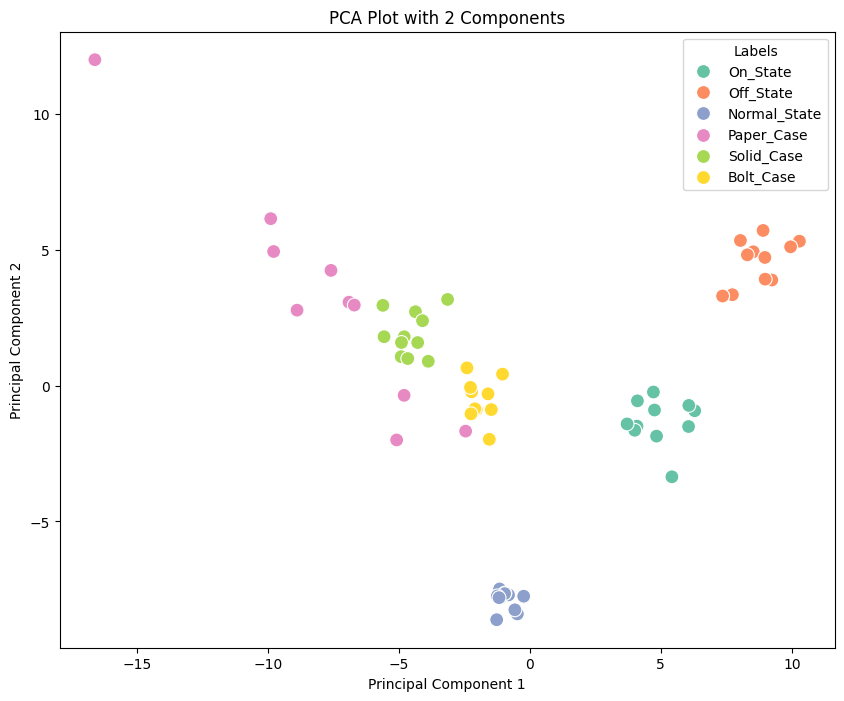

Explained Variance Ratio: [0.37858545 0.21741308]
Cumulative Explained Variance: [0.37858545 0.59599852]


In [20]:
def perform_pca_on_dataset(df, label_col='audio_label', n_components=2):
    """
    Perform PCA on the entire dataset and plot the first two principal components.

    Parameters:
    - df: DataFrame containing the data.
    - label_col: Column name for labels (e.g., 'audio_label').
    - n_components: Number of principal components to compute.
    """
    # Create a copy of the DataFrame to avoid altering the original
    df_copy = df.copy()

    # Drop non-numeric columns and fill missing values
    df_numeric = df_copy.select_dtypes(include=[np.number])
    df_numeric.fillna(df_numeric.mean(), inplace=True)

    # Extract labels
    labels = df_copy[label_col] if label_col in df_copy.columns else None

    # Normalize the features
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(df_numeric)

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_features = pca.fit_transform(normalized_data)

    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=pca_features, columns=[f'PC{i+1}' for i in range(n_components)])
    if labels is not None:
        pca_df[label_col] = labels.values

    # Plot the first two principal components
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x='PC1', y='PC2',
        hue=label_col if label_col in pca_df.columns else None,
        data=pca_df, palette='Set2', s=100
    )
    plt.title(f'PCA Plot with {n_components} Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Labels', loc='upper right')
    plt.show()

    # Explained variance
    explained_variance = pca.explained_variance_ratio_
    print(f"Explained Variance Ratio: {explained_variance}")
    print(f"Cumulative Explained Variance: {np.cumsum(explained_variance)}")

# Example Usage
perform_pca_on_dataset(df_opensmile, label_col='audio_label', n_components=2)



Classifier: Logistic Regression
Classification Report:
              precision    recall  f1-score    support
Bolt_Case      1.000000  1.000000  1.000000   3.000000
Normal_State   1.000000  1.000000  1.000000   2.000000
Off_State      1.000000  1.000000  1.000000   1.000000
On_State       1.000000  1.000000  1.000000   4.000000
Paper_Case     0.000000  0.000000  0.000000   1.000000
Solid_Case     0.666667  1.000000  0.800000   2.000000
accuracy       0.923077  0.923077  0.923077   0.923077
macro avg      0.777778  0.833333  0.800000  13.000000
weighted avg   0.871795  0.923077  0.892308  13.000000

Confusion Matrix:
                   Pred_Bolt_Case  Pred_Normal_State  Pred_Off_State  \
True_Bolt_Case                  3                  0               0   
True_Normal_State               0                  2               0   
True_Off_State                  0                  0               1   
True_On_State                   0                  0               0   
True_Paper_Case 

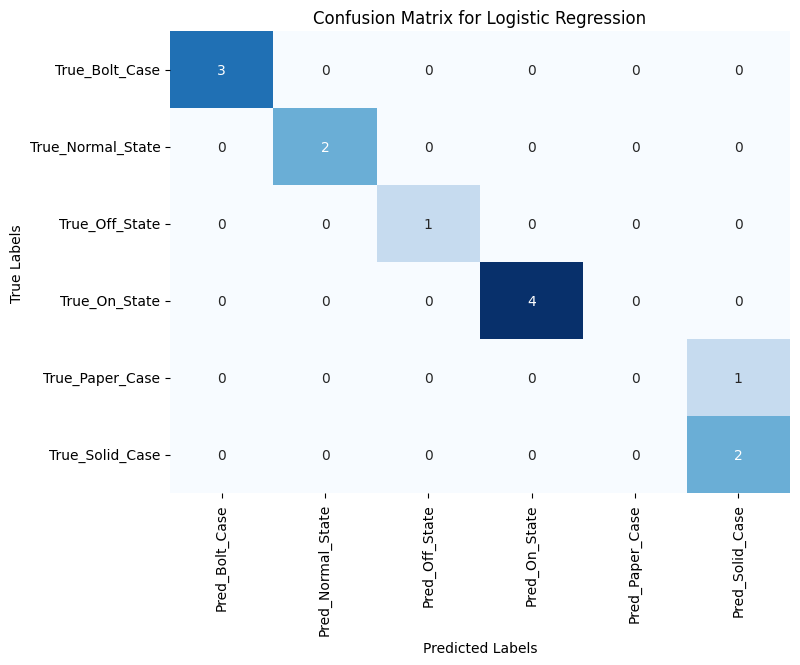

Accuracy: 0.9231

Classifier: Random Forest
Classification Report:
              precision  recall  f1-score  support
Bolt_Case           1.0     1.0       1.0      3.0
Normal_State        1.0     1.0       1.0      2.0
Off_State           1.0     1.0       1.0      1.0
On_State            1.0     1.0       1.0      4.0
Paper_Case          1.0     1.0       1.0      1.0
Solid_Case          1.0     1.0       1.0      2.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     13.0
weighted avg        1.0     1.0       1.0     13.0

Confusion Matrix:
                   Pred_Bolt_Case  Pred_Normal_State  Pred_Off_State  \
True_Bolt_Case                  3                  0               0   
True_Normal_State               0                  2               0   
True_Off_State                  0                  0               1   
True_On_State                   0                  0               0   
True_Paper_Case                 0           

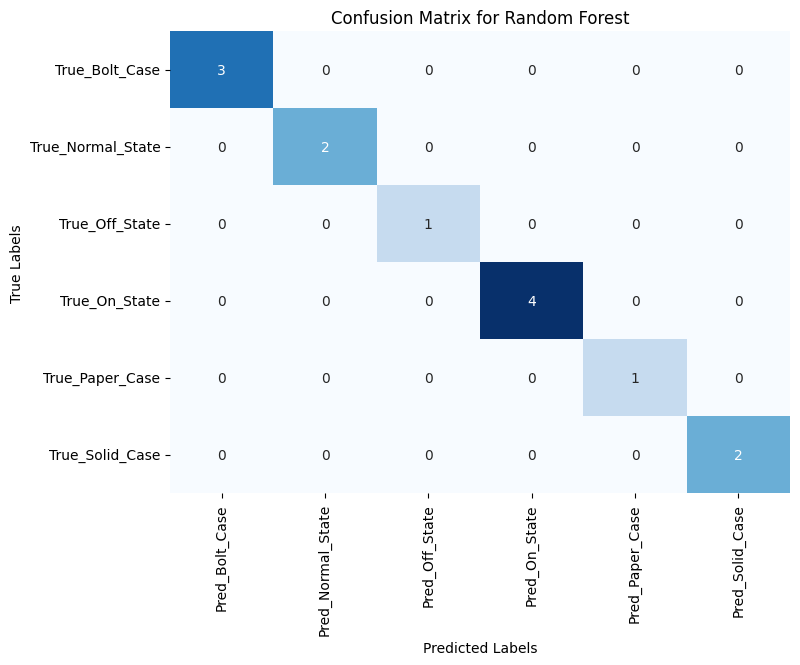

Accuracy: 1.0000

Classifier: SVM
Classification Report:
              precision    recall  f1-score    support
Bolt_Case      1.000000  1.000000  1.000000   3.000000
Normal_State   1.000000  1.000000  1.000000   2.000000
Off_State      1.000000  1.000000  1.000000   1.000000
On_State       1.000000  1.000000  1.000000   4.000000
Paper_Case     0.000000  0.000000  0.000000   1.000000
Solid_Case     0.666667  1.000000  0.800000   2.000000
accuracy       0.923077  0.923077  0.923077   0.923077
macro avg      0.777778  0.833333  0.800000  13.000000
weighted avg   0.871795  0.923077  0.892308  13.000000

Confusion Matrix:
                   Pred_Bolt_Case  Pred_Normal_State  Pred_Off_State  \
True_Bolt_Case                  3                  0               0   
True_Normal_State               0                  2               0   
True_Off_State                  0                  0               1   
True_On_State                   0                  0               0   
True_Paper_Cas

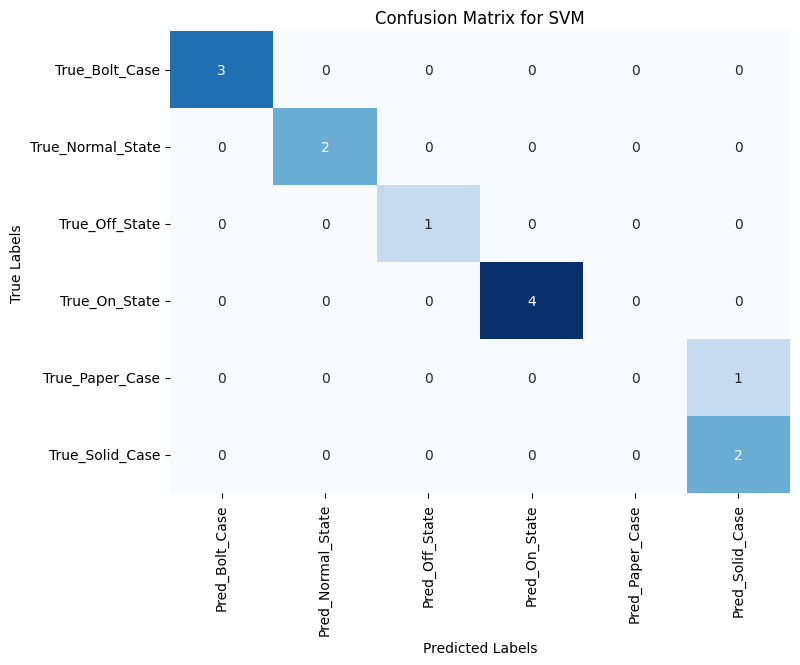

Accuracy: 0.9231

Classifier: K-Nearest Neighbors
Classification Report:
              precision    recall  f1-score    support
Bolt_Case      0.750000  1.000000  0.857143   3.000000
Normal_State   1.000000  1.000000  1.000000   2.000000
Off_State      1.000000  1.000000  1.000000   1.000000
On_State       1.000000  1.000000  1.000000   4.000000
Paper_Case     1.000000  1.000000  1.000000   1.000000
Solid_Case     1.000000  0.500000  0.666667   2.000000
accuracy       0.923077  0.923077  0.923077   0.923077
macro avg      0.958333  0.916667  0.920635  13.000000
weighted avg   0.942308  0.923077  0.915751  13.000000

Confusion Matrix:
                   Pred_Bolt_Case  Pred_Normal_State  Pred_Off_State  \
True_Bolt_Case                  3                  0               0   
True_Normal_State               0                  2               0   
True_Off_State                  0                  0               1   
True_On_State                   0                  0               0  

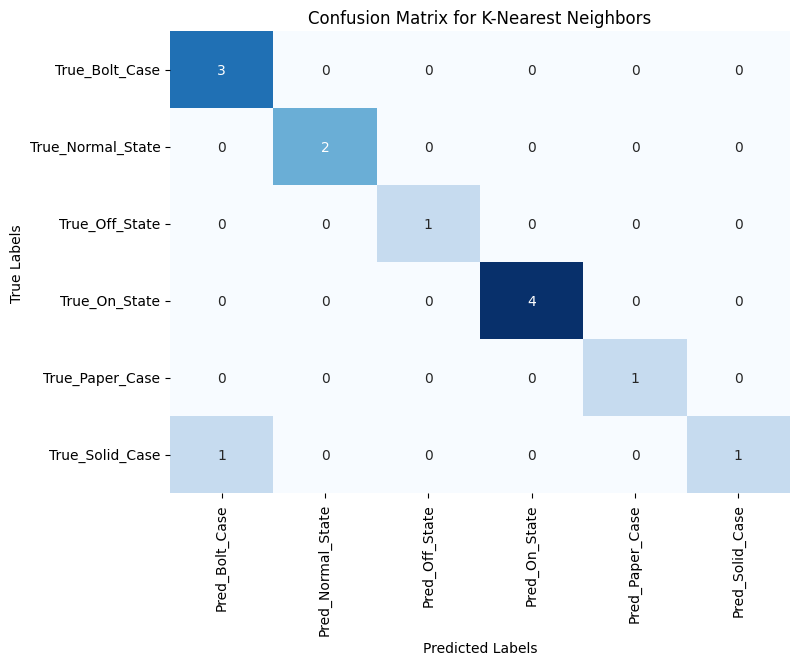

Accuracy: 0.9231

Classifier: Decision Tree
Classification Report:
              precision  recall  f1-score  support
Bolt_Case           1.0     1.0       1.0      3.0
Normal_State        1.0     1.0       1.0      2.0
Off_State           1.0     1.0       1.0      1.0
On_State            1.0     1.0       1.0      4.0
Paper_Case          1.0     1.0       1.0      1.0
Solid_Case          1.0     1.0       1.0      2.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     13.0
weighted avg        1.0     1.0       1.0     13.0

Confusion Matrix:
                   Pred_Bolt_Case  Pred_Normal_State  Pred_Off_State  \
True_Bolt_Case                  3                  0               0   
True_Normal_State               0                  2               0   
True_Off_State                  0                  0               1   
True_On_State                   0                  0               0   
True_Paper_Case                 0           

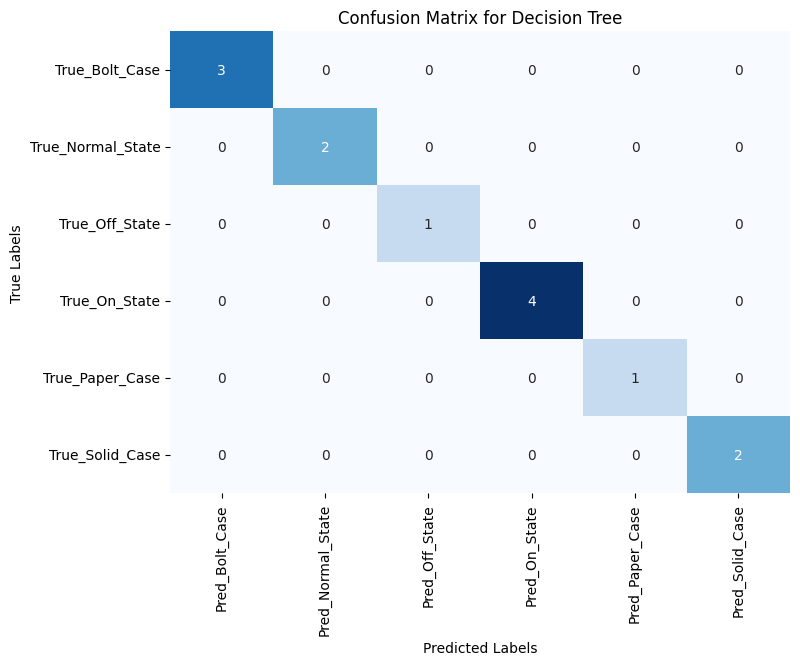

Accuracy: 1.0000


Best Classifier: Random Forest with accuracy 1.0000


In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define classifiers as a dictionary
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    print(f"Classifier: {clf_name}")

    # Train the classifier
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Generate classification report and convert to DataFrame
    report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()

    # Display classification report
    print("Classification Report:")
    print(report_df)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Ensure consistent label sorting
    labels = sorted(list(set(y_test).union(set(y_pred))))

    # Create a confusion matrix DataFrame with proper labels
    cm_df = pd.DataFrame(cm, index=[f"True_{label}" for label in labels],
                         columns=[f"Pred_{label}" for label in labels])

    # Display confusion matrix
    print("\nConfusion Matrix:")
    print(cm_df)

    # Optionally, plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {clf_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Calculate and display accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

    # Store results in the dictionary
    results[clf_name] = {
        'Accuracy': accuracy,
        'Classification Report': report_df,
        'Confusion Matrix': cm_df
    }

# Identify the best classifier based on accuracy
best_classifier = max(results, key=lambda x: results[x]['Accuracy'])
print(f"\nBest Classifier: {best_classifier} with accuracy {results[best_classifier]['Accuracy']:.4f}")



In [22]:
from sklearn.model_selection import cross_val_score

# Identify the best classifier
best_classifier = max(results, key=lambda x: results[x]['Accuracy'])
best_clf = classifiers[best_classifier]

# Perform cross-validation on the best classifier
cv_scores = cross_val_score(best_clf, X_selected, y, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Display the results
print(f"Best Classifier: {best_classifier}")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {cv_scores.std():.4f}")


Best Classifier: Random Forest
Cross-Validation Accuracy Scores: [1.         1.         0.92307692 1.         1.        ]
Mean Cross-Validation Accuracy: 0.9846
Standard Deviation of Cross-Validation Accuracy: 0.0308


In [25]:
len(df_opensmile)

65

In [38]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import pandas as pd

# Assuming `df_opensmile` is your dataframe containing audio feature columns
data = df_opensmile.copy()

# Example: List of audio file paths (make sure this matches the number of rows in `data`)
audio_file_paths = [
    '/content/OnState1.wav','/content/OffState1.wav','/content/Normal1.wav','/content/OnState2.wav','/content/OffState2.wav','/content/Normal2.wav',
    '/content/OnState3.wav','/content/Normal3.wav','/content/OffState3.wav','/content/OnState4.wav','/content/Normal4.wav','/content/OffState4.wav',
    '/content/OnState5.wav','/content/Normal5.wav','/content/OffState5.wav','/content/OffState6.wav','/content/Normal6.wav','/content/OnState6.wav',
    '/content/OnState7.wav','/content/Normal7.wav','/content/OffState7.wav','/content/OnState8.wav','/content/Normal8.wav','/content/OffState8.wav',
    '/content/OnState9.wav','/content/Normal9.wav','/content/OffState9.wav','/content/OnState10.wav','/content/Normal10.wav','/content/OffState10.wav',
    '/content/OnState11.wav','/content/Normal11.wav','/content/OffState.wav','/content/OffState11.wav',
    '/content/Paper1.wav','/content/Paper2.wav','/content/Paper3.wav','/content/Paper4.wav','/content/Paper5.wav','/content/Paper6.wav',
    '/content/Paper7.wav','/content/Paper8.wav','/content/Paper9.wav','/content/Paper10.wav',
    '/content/solidsound6.wav','/content/solidsound7.wav','/content/solidsound8.wav','/content/solidsound9.wav','/content/solidsound10.wav',
    '/content/solidsound11.wav','/content/solidsound12.wav','/content/solidsound13.wav','/content/solidsound14.wav','/content/solidsound15.wav',
    '/content/boltsound11.wav','/content/boltsound12.wav','/content/boltsound13.wav','/content/boltsound14.wav','/content/boltsound15.wav',
    '/content/boltsound16.wav','/content/boltsound17.wav','/content/boltsound18.wav','/content/boltsound19.wav','/content/boltsound20.wav',
    '/content/solidsound16.wav'
]

print("Length of audio_file_paths:", len(audio_file_paths))
print("Number of rows in df_opensmile:", len(df_opensmile))

# Add the audio file paths as a new column in the DataFrame
df_opensmile['audio_file'] = audio_file_paths

# Select numerical feature columns
feature_columns = data.select_dtypes(include=[float]).columns
X = data[feature_columns]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_scaled)

# Predict anomalies (-1 for anomalies, 1 for normal)
df_opensmile['anomaly'] = iso_forest.predict(X_scaled)

# Evaluate the results using labeled data (if available)
df_opensmile['is_anomaly'] = df_opensmile['audio_label'].apply(lambda x: -1 if x != 'Normal_State' else 1)

# Classification report
print("\nClassification Report:")
print(classification_report(df_opensmile['is_anomaly'], df_opensmile['anomaly']))

# Count anomalies detected
anomaly_counts = df_opensmile['anomaly'].value_counts()
print("\nAnomaly counts:")
print(anomaly_counts)

# Filter detected anomalies
anomalies = df_opensmile[df_opensmile['anomaly'] == -1]
print("\nDetected anomalies:")
print(anomalies[['audio_file', 'audio_label', 'anomaly']])

# Save detected anomalies to CSV
anomalies.to_csv('detected_anomalies_with_paths.csv', index=False)


Length of audio_file_paths: 65
Number of rows in df_opensmile: 65

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.13      0.23        54
           1       0.19      1.00      0.32        11

    accuracy                           0.28        65
   macro avg       0.59      0.56      0.27        65
weighted avg       0.86      0.28      0.24        65


Anomaly counts:
anomaly
 1    58
-1     7
Name: count, dtype: int64

Detected anomalies:
                audio_file audio_label  anomaly
1   /content/OffState1.wav   Off_State       -1
34     /content/Paper1.wav  Paper_Case       -1
35     /content/Paper2.wav  Paper_Case       -1
36     /content/Paper3.wav  Paper_Case       -1
40     /content/Paper7.wav  Paper_Case       -1
41     /content/Paper8.wav  Paper_Case       -1
42     /content/Paper9.wav  Paper_Case       -1


#STORE NEW NOISES

In [ ]:
pip install azure-storage-blob scikit-learn librosa pandas matplotlib


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from azure.storage.blob import BlobServiceClient
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [ ]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Extract various audio features
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    chroma = librosa.feature.chroma_stft(y=y, sr=sr).mean(axis=1)

    # Combine features into a single vector
    features = np.hstack([mfcc, spectral_centroid, spectral_bandwidth, chroma])

    return features
